In [1]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format

# 데이터 로드
data = './ratings_Beauty.csv'
data = pd.read_csv(data)

# 데이터의 처음 몇 행을 표시
print(data.head())

           UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461 5.00000  1369699200
1  A3JM6GV9MNOF9X  0558925278 3.00000  1355443200
2  A1Z513UWSAAO0F  0558925278 5.00000  1404691200
3  A1WMRR494NWEWV  0733001998 4.00000  1382572800
4  A3IAAVS479H7M7  0737104473 1.00000  1274227200


In [2]:
# 결측값 처리
data = data.dropna()  # 결측값이 있는 행을 제거

# 데이터 타입 확인 및 변환
print(data.dtypes)

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object


In [3]:
# 사용자별 특징 추출
user_features = data.groupby('UserId').agg({
    'Rating': ['mean', 'count'],
    'Timestamp': 'max'
}).reset_index()
user_features.columns = ['UserId', 'avg_rating', 'num_reviews', 'last_review']

print(user_features.head())

                  UserId  avg_rating  num_reviews  last_review
0  A00008821J0F472NDY6A2     5.00000            1   1368057600
1  A000186437REL8X2RW8UW     5.00000            1   1397088000
2   A0002574WYJMBWKNCPY8     3.00000            1   1391558400
3  A00029263J863WSR0TDRS     5.00000            1   1402876800
4   A00031961JI1CBNV98TW     5.00000            1   1395532800


In [4]:
from sklearn.cluster import KMeans

# K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=0).fit(user_features[['avg_rating', 'num_reviews']])
user_features['cluster'] = kmeans.labels_

print(user_features.head())

                  UserId  avg_rating  num_reviews  last_review  cluster
0  A00008821J0F472NDY6A2     5.00000            1   1368057600        1
1  A000186437REL8X2RW8UW     5.00000            1   1397088000        1
2   A0002574WYJMBWKNCPY8     3.00000            1   1391558400        0
3  A00029263J863WSR0TDRS     5.00000            1   1402876800        1
4   A00031961JI1CBNV98TW     5.00000            1   1395532800        1


In [5]:
# 사용자 클러스터 테이블 출력
print(user_features[['UserId', 'avg_rating', 'num_reviews', 'cluster']])

                        UserId  avg_rating  num_reviews  cluster
0        A00008821J0F472NDY6A2     5.00000            1        1
1        A000186437REL8X2RW8UW     5.00000            1        1
2         A0002574WYJMBWKNCPY8     3.00000            1        0
3        A00029263J863WSR0TDRS     5.00000            1        1
4         A00031961JI1CBNV98TW     5.00000            1        1
...                        ...         ...          ...      ...
1210266          AZZZLZXCEE4WK     3.50000            2        1
1210267          AZZZMSZI9LKE6     4.50000            4        3
1210268          AZZZO4QCZROW8     1.00000            1        0
1210269          AZZZRS1YZ8HVP     5.00000            1        1
1210270          AZZZU2TD7Q3ET     5.00000            1        1

[1210271 rows x 4 columns]


In [6]:
# 클러스터별 평균 값 확인
cluster_summary = user_features.groupby('cluster').mean()
print(cluster_summary)

         avg_rating  num_reviews      last_review
cluster                                          
0           1.92270      1.19843 1360532592.33267
1           4.75811      1.29235 1360053385.05716
2           4.17008     89.86316 1398756277.89474
3           4.21812      5.66060 1382028624.92518
4           4.19092     20.10990 1392003169.33798


In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

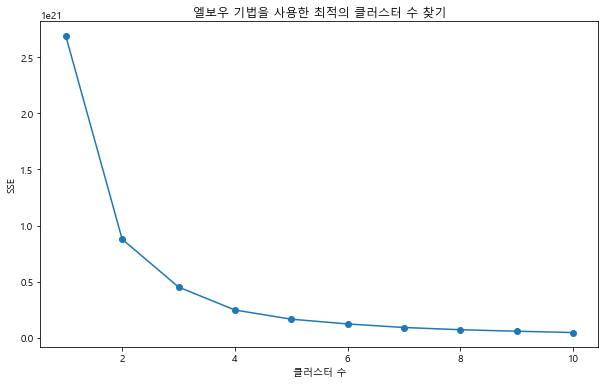

<Figure size 432x576 with 0 Axes>

In [8]:
# 엘보우 기법을 사용하여 최적의 클러스터 수 찾기
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(user_features[['avg_rating', 'num_reviews', 'last_review']])
    sse.append(kmeans.inertia_)

# SSE 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('SSE')
plt.title('엘보우 기법을 사용한 최적의 클러스터 수 찾기')
plt.figure(figsize=(6,8))
plt.show()

In [9]:
# 최적의 클러스터 수를 사용하여 K-Means 클러스터링 적용
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(user_features[['avg_rating', 'num_reviews', 'last_review']])
user_features['cluster'] = kmeans.labels_

In [10]:
# 클러스터별 평균 값 확인
cluster_summary = user_features.groupby('cluster').mean()
print(cluster_summary)

         avg_rating  num_reviews      last_review
cluster                                          
0           4.11412      1.99106 1393877504.21138
1           4.05241      1.28494 1319328133.42977
2           4.19702      1.13494 1180992779.73174
3           4.13068      1.50257 1364008629.24404
4           4.14721      1.18550 1261591502.94348


0    553477
3    406011
1    153465
4     66452
2     30866
Name: cluster, dtype: int64


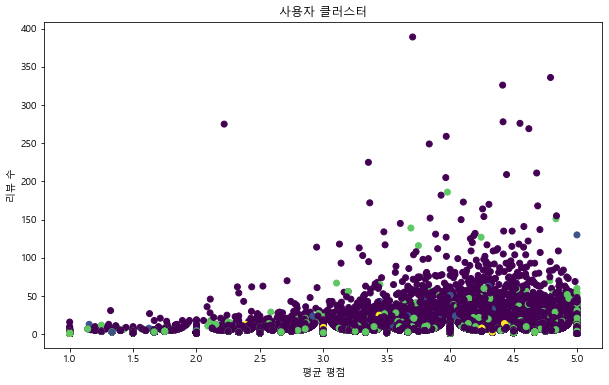

In [11]:
# 클러스터별 사용자 수 확인
cluster_counts = user_features['cluster'].value_counts()
print(cluster_counts)

# 클러스터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(user_features['avg_rating'], user_features['num_reviews'], c=user_features['cluster'])
plt.xlabel('평균 평점')
plt.ylabel('리뷰 수')
plt.title('사용자 클러스터')
plt.show()

In [12]:
output_file_path = './user_clusters.csv'
user_features.to_csv(output_file_path, index=False)